In [34]:
import pandas as pd

random_5_800_df = pd.read_pickle("random_5_800_df")
entropy_5_800_df = pd.read_pickle("entropy_5_800_df")
entropy_20_20_df = pd.read_pickle("entropy_20_20_df")

In [6]:
random_5_800_df

,Clicks,MAP@800,NDCG,Precision@800,R-Precision,Recall@800
0,"(19.171492463143945, 0.4982477049551618)","(0.005627410303500504, 0.00018548663877745563)","(0.07431364130108341, 0.0012162769555116941)","(0.0056636160344542, 0.0001739329360375442)","(0.005515748100761256, 0.00044375278285454215)","(0.23193144305858734, 0.003710631810077509)"
1,"(19.626233593620206, 0.5033332272126703)","(0.004311045988065067, 0.00014067457432227447)","(0.06792475354163016, 0.001224930328999198)","(0.004334814753281276, 0.00013142142279195544)","(0.0041437290091718955, 0.0004439043280856824)","(0.23152233695224633, 0.004335216622777486)"
2,"(19.864923747276688, 0.5083188611098515)","(0.003352997577112294, 0.00011639545948108672)","(0.0613486286978211, 0.0012598211202872467)","(0.0033140606670018433, 0.00010450059014439917)","(0.0033143404656902566, 0.0004385508799594365)","(0.22804710268848566, 0.005029422285693739)"
3,"(20.31703146374829, 0.5169302118803473)","(0.0026497146540115524, 9.47356052238105e-05)","(0.056971828460197424, 0.0012704484409951382)","(0.0026528300273597812, 8.360449492640609e-05)","(0.0022959300680607856, 0.00037548284757260515)","(0.2311712170823277, 0.0055416652110662715)"
4,"(20.626447298961818, 0.5358178614396574)","(0.0020106931052956004, 7.423455447662371e-05)","(0.051637012790317266, 0.0013076838768182936)","(0.0020172004223121594, 6.415556278076944e-05)","(0.002087113531338626, 0.000511008839619905)","(0.22822107833636582, 0.006094915830926003)"


In [8]:
entropy_20_20_df

,Clicks,MAP@20,NDCG,Precision@20,R-Precision,Recall@20
0,"(4.461305284081497, 0.03394959141617407)","(0.005336752623810093, 0.0005324178246326021)","(0.006056571237275031, 0.00045993117722089075)","(0.007942686764949478, 0.0005261382564974792)","(0.004355694092371096, 0.00036518203448432135)","(0.008038027002066643, 0.0007210873165436422)"
1,"(4.560162332284247, 0.032973999354848536)","(0.007220001418397622, 0.0007084798897159514)","(0.005186662148623703, 0.0004787495011189034)","(0.005946662249461654, 0.00046949330409968166)","(0.003726454184544274, 0.00038437073228716627)","(0.005247219368966904, 0.0005945367362012373)"
2,"(4.757611396388935, 0.0256763631981616)","(0.004557837917369131, 0.0005567970667585783)","(0.002985582099239805, 0.0003925553895614634)","(0.0029898956435315555, 0.000332422072749206)","(0.002145176063431347, 0.0003201050077376359)","(0.002567117142983823, 0.0003869197270329294)"
3,"(4.660046380652642, 0.028284537916648502)","(0.0036342935642312267, 0.00039983134577753287)","(0.003466921122632227, 0.0003830571782896206)","(0.004737452377008448, 0.0004150424985719253)","(0.002991120749516098, 0.00037583054110123317)","(0.004380259466797933, 0.0006868780156480265)"
4,"(4.389295774647888, 0.036415488836607)","(0.00741046956481496, 0.0006576091636198983)","(0.007379497024380393, 0.0005909889312663076)","(0.00947804473902237, 0.0006115808275722783)","(0.005310843980243482, 0.00048702097538931235)","(0.009055590134264994, 0.0008378797781107551)"
5,"(4.669295774647887, 0.02763477412008673)","(0.0033496813144549774, 0.00040489825070430676)","(0.003414124564032297, 0.0003673987687505274)","(0.004623032311516156, 0.00040306459426771253)","(0.0024558790575570184, 0.00029132634530588085)","(0.004399708937907864, 0.000556516390920587)"
6,"(4.391317315658658, 0.036132610164319914)","(0.00626172746120689, 0.0005178912808238396)","(0.007052262611669957, 0.0005003579895590022)","(0.008906379453189728, 0.0005603898335587701)","(0.004878712810329103, 0.0004237796014168809)","(0.009825138716840784, 0.0008453267388497448)"
7,"(4.509411764705883, 0.03594096316401095)","(0.01137631054785951, 0.0009722441606643495)","(0.009726839333295566, 0.0009484783382611564)","(0.005724937862468932, 0.0004301032638321758)","(0.006242524021382845, 0.0007405608221443535)","(0.007608356016875155, 0.0008730030570040003)"
8,"(4.704540182270091, 0.02721521912960288)","(0.0051719258921620785, 0.0006752649307851062)","(0.004085009315548228, 0.0005446709175500159)","(0.0038608119304059654, 0.00036156740036536453)","(0.0023181416147421826, 0.00033039518406315375)","(0.003261669440524196, 0.0004312564777006114)"
9,"(4.683595691797846, 0.028269788219708214)","(0.004260887720373281, 0.0004562753565040453)","(0.003421429591033837, 0.00037248131035510866)","(0.004009942004971003, 0.00036991456741513045)","(0.0026857038567792944, 0.00032664683400833726)","(0.0040550404847273245, 0.0005549722700125006)"


In [3]:
entropy_5_800_df

,Clicks,MAP@800,NDCG,Precision@800,R-Precision,Recall@800
0,"(19.53095908563856, 0.521122542413458)","(0.005173888064289075, 0.00017918557256281733)","(0.06629355957259808, 0.0011853145291195813)","(0.005108290541659765, 0.00016231259744098507)","(0.00615652646494731, 0.0004604689708619334)","(0.20227911997737397, 0.003540468844750118)"
1,"(19.984827357237716, 0.5285132259384954)","(0.004349093387399893, 0.00015150501551595342)","(0.06657129541419342, 0.001270128744034142)","(0.004418575697211155, 0.00013876866511759018)","(0.004778201225523148, 0.00043222413824081836)","(0.21991068981279865, 0.004149208665353933)"
2,"(19.03504259228328, 0.4735368257571274)","(0.003639637559162217, 0.00011581221412436018)","(0.06454189522878567, 0.001243020090722367)","(0.0035368297978954407, 0.00010703128791065895)","(0.0031178623233555727, 0.0005155656653150765)","(0.23840932612762536, 0.004896993973902887)"
3,"(20.2447542934875, 0.47719734087921833)","(0.0026506441755835206, 9.285883644901203e-05)","(0.05669341435206688, 0.0012024376054056657)","(0.002751870430198946, 8.630912791332279e-05)","(0.0020797691095677555, 0.000354527655773156)","(0.22959610430950292, 0.005278632960195026)"
4,"(23.37516067396213, 0.5892797466149977)","(0.001560881169475071, 6.267612242778699e-05)","(0.04590963267929167, 0.0013084387670696065)","(0.0017936859475421228, 5.682063490279672e-05)","(0.0019313710170475913, 0.0007276560178637869)","(0.2089698063532413, 0.0059609882026896155)"


In [37]:
entropy_20_20_df.columns = ["Clicks", "MAP@20", "NDCG", "Precision@20", "R-Precision", "Recall@20"]
# entropy_20_20_df_copy = entropy_20_20_df.reset_index()
entropy_20_20_df_copy = entropy_20_20_df
# entropy_20_20_df_copy['MAP@20_ci'] = entropy_20_20_df_copy['MAP@20'].apply(lambda x: x[1])
entropy_20_20_df_copy['MAP@20'] = entropy_20_20_df_copy['MAP@20'].apply(lambda x: x[0])
# entropy_20_20_df_copy['NDCG_ci'] = entropy_20_20_df_copy['NDCG'].apply(lambda x: x[1])
entropy_20_20_df_copy['NDCG'] = entropy_20_20_df_copy['NDCG'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Precision@20_ci'] = entropy_20_20_df_copy['Precision@20'].apply(lambda x: x[1])
entropy_20_20_df_copy['Precision@20'] = entropy_20_20_df_copy['Precision@20'].apply(lambda x: x[0])
# entropy_20_20_df_copy['R-Precision_ci'] = entropy_20_20_df_copy['R-Precision'].apply(lambda x: x[1])
entropy_20_20_df_copy['R-Precision'] = entropy_20_20_df_copy['R-Precision'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Recall@20_ci'] = entropy_20_20_df_copy['Recall@20'].apply(lambda x: x[1])
entropy_20_20_df_copy['Recall@20'] = entropy_20_20_df_copy['Recall@20'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Clicks_ci'] = entropy_20_20_df_copy['Clicks'].apply(lambda x: x[1])
entropy_20_20_df_copy['Clicks'] = entropy_20_20_df_copy['Clicks'].apply(lambda x: x[0])
entropy_20_20_df_copy

,Clicks,MAP@20,NDCG,Precision@20,R-Precision,Recall@20
0,4.461305,0.005337,0.006057,0.007943,0.004356,0.008038
1,4.560162,0.007220,0.005187,0.005947,0.003726,0.005247
2,4.757611,0.004558,0.002986,0.002990,0.002145,0.002567
3,4.660046,0.003634,0.003467,0.004737,0.002991,0.004380
4,4.389296,0.007410,0.007379,0.009478,0.005311,0.009056
5,4.669296,0.003350,0.003414,0.004623,0.002456,0.004400
6,4.391317,0.006262,0.007052,0.008906,0.004879,0.009825
7,4.509412,0.011376,0.009727,0.005725,0.006243,0.007608
8,4.704540,0.005172,0.004085,0.003861,0.002318,0.003262
9,4.683596,0.004261,0.003421,0.004010,0.002686,0.004055


In [27]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

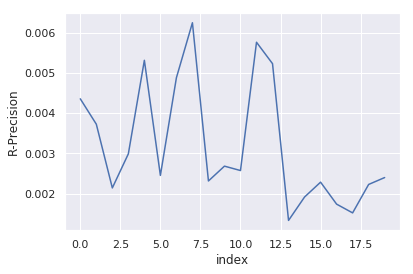

In [23]:
# sns.lineplot(x='index', y="R-Precision", data=entropy_20_20_df_copy)

[[<matplotlib.axis.XTick at 0x7f1944c38e10>,

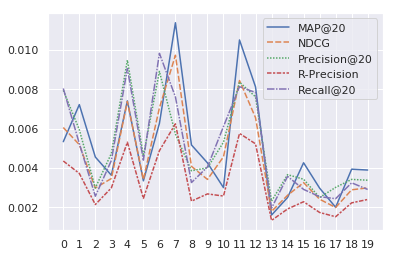

In [42]:
import numpy as np
ax = sns.lineplot(data=entropy_20_20_df_copy[["MAP@20", "NDCG", "Precision@20", "R-Precision", "Recall@20"]])
ax.set(xticks=np.arange(0,20,1))

In [50]:
random_5_800_df.columns = ["Clicks", "MAP@800", "NDCG", "Precision@800", "R-Precision", "Recall@800"]
# random_5_800_df_copy = random_5_800_df
# random_5_800_df_copy["Random_MAP@800"] = random_5_800_df_copy["MAP@800"].apply(lambda x: x[0])
# random_5_800_df['Random_NDCG'] = random_5_800_df['NDCG'].apply(lambda x: x[0])
# random_5_800_df['Random_Precision@800'] = random_5_800_df['Precision@800'].apply(lambda x: x[0])
# random_5_800_df['Random_R-Precision'] = random_5_800_df['R-Precision'].apply(lambda x: x[0])
# random_5_800_df['Random_Recall@800'] = random_5_800_df['Recall@800'].apply(lambda x: x[0])
random_5_800_df_copy

,Clicks,MAP@800,NDCG,Precision@800,R-Precision,Recall@800
0,19.171492,0.005627,0.074314,0.005664,0.005516,0.231931
1,19.626234,0.004311,0.067925,0.004335,0.004144,0.231522
2,19.864924,0.003353,0.061349,0.003314,0.003314,0.228047
3,20.317031,0.002650,0.056972,0.002653,0.002296,0.231171
4,20.626447,0.002011,0.051637,0.002017,0.002087,0.228221
